In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
df[df['Diabetes_binary']==1]


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
64,1.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,4.0,30.0,30.0,1.0,0.0,10.0,4.0,3.0
81,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,3.0,0.0,0.0,1.0,7.0,4.0,7.0
193,1.0,1.0,1.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,8.0
236,1.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,12.0,6.0,6.0
275,1.0,1.0,1.0,1.0,32.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,8.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265484,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
265485,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
265486,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
265487,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


df["Diabetes_binary"] = (df["Diabetes_binary"] > 0).astype(int)
y = df["Diabetes_binary"].astype(int).values

print("Label counts (all data):")
print(df["Diabetes_binary"].value_counts())

continuous_feature_cols = ["BMI", "PhysHlth", "MentHlth"]

ordinal_feature_cols = ["Age", "Education", "Income"]

feature_cols = [
    "HighBP", "HighChol", "CholCheck", "BMI",
    "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "GenHlth", "MentHlth",
    "PhysHlth", "DiffWalk", "Sex",
    "Age", "Education", "Income",
]

X = df[feature_cols].astype("float64")

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=feature_cols)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=511,
    stratify=y,
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    random_state=511,
    stratify=y_train_full,
)

print("Original Train size:", X_train.shape,
      "Val size:", X_val.shape,
      "Test size:", X_test.shape)
print("Original train class counts:", np.bincount(y_train))

standard_scaler = StandardScaler()
X_train[continuous_feature_cols] = standard_scaler.fit_transform(X_train[continuous_feature_cols])
X_val[continuous_feature_cols] = standard_scaler.transform(X_val[continuous_feature_cols])
X_test[continuous_feature_cols] = standard_scaler.transform(X_test[continuous_feature_cols])

minmax_scaler = MinMaxScaler()
X_train[ordinal_feature_cols] = minmax_scaler.fit_transform(X_train[ordinal_feature_cols])
X_val[ordinal_feature_cols] = minmax_scaler.transform(X_val[ordinal_feature_cols])
X_test[ordinal_feature_cols] = minmax_scaler.transform(X_test[ordinal_feature_cols])

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

# rus = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("After RUS train class counts:", np.bincount(y_train_bal))
print("Balanced Train size:", X_train_bal.shape)

class_weights = {0: 1.0, 1: 1.0}
print("Class weights (for model.fit):", class_weights)


Label counts (all data):
Diabetes_binary
0    194377
1     74754
Name: count, dtype: int64
Original Train size: (150712, 21) Val size: (37679, 21) Test size: (80740, 21)
Original train class counts: [108850  41862]
After RUS train class counts: [108850 108850]
Balanced Train size: (217700, 21)
Class weights (for model.fit): {0: 1.0, 1: 1.0}


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

model = Sequential([
    Input(shape=(X_train_bal.shape[1],)),

    Dense(256, activation="relu",
          kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.3),

    Dense(128, activation="relu",
          kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.2),

    Dense(64, activation="relu"),
    Dropout(0.2),

    Dense(16, activation="relu"),

    Dense(1, activation="sigmoid"),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

early_stopping = EarlyStopping(
    monitor="val_auc",
    mode="max",
    patience=6,
    restore_best_weights=True,
)

history = model.fit(
    X_train_bal,
    y_train_bal,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    # class_weight=class_weights,
    callbacks=[early_stopping],
    verbose=1,
)

model.summary()


Epoch 1/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6672 - auc: 0.7300 - loss: 0.6271 - recall: 0.7420 - val_accuracy: 0.6950 - val_auc: 0.7989 - val_loss: 0.5695 - val_recall: 0.7963
Epoch 2/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7248 - auc: 0.7956 - loss: 0.5636 - recall: 0.7792 - val_accuracy: 0.7024 - val_auc: 0.8023 - val_loss: 0.5553 - val_recall: 0.7863
Epoch 3/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7283 - auc: 0.8013 - loss: 0.5551 - recall: 0.7843 - val_accuracy: 0.7046 - val_auc: 0.8041 - val_loss: 0.5504 - val_recall: 0.7893
Epoch 4/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7321 - auc: 0.8046 - loss: 0.5491 - recall: 0.7882 - val_accuracy: 0.7023 - val_auc: 0.8050 - val_loss: 0.5547 - val_recall: 0.7929
Epoch 5/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7341 - auc: 0.8075 - loss: 0.5452 - recall: 0.7885 - val_accuracy: 0.7041 - val_auc: 0.8060 - val_loss: 0.5553 - val_recall: 0.7928
Epoch 6/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,525 (560.65 KB)

 Trainable params: 47,841 (186.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 95,684 (373.77 KB)

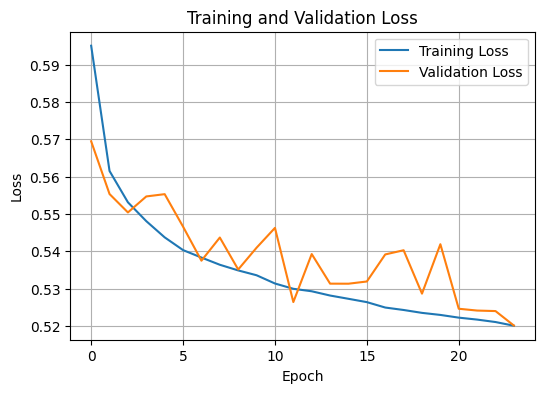

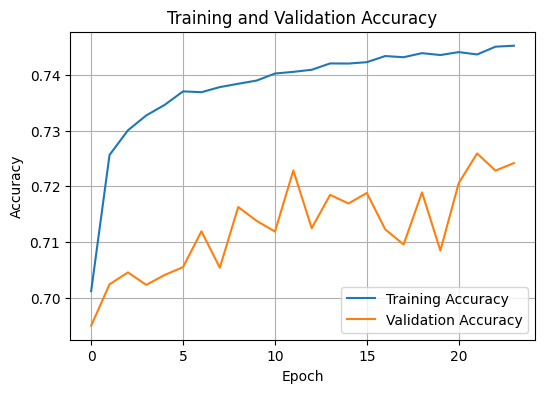

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
import seaborn as sns
import numpy as np

# -----------------------------
# 1. LOSS
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 2. ACCURACY
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
